# Mapping Overdose Vulnerability
## Andy Asher, NWMSU
### https://github.com/andyakiva/capstone

Import the cleaned data and the needed packages

In [740]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


csv = r'C:\Users\Andy\Documents\OverdoseAnalysis\ReadyData.csv'
data = pd.read_csv(csv)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Zip Code                           48 non-null     int64  
 1   Males Widowed                      48 non-null     float64
 2   Males Divorced                     48 non-null     float64
 3   Females Widowed                    48 non-null     float64
 4   Females Divorced                   48 non-null     float64
 5   High school graduate or higher     48 non-null     float64
 6   Bachelor's degree or higher        48 non-null     float64
 7   Civilian veterans                  48 non-null     float64
 8   With a disability                  48 non-null     float64
 9   Unemployment Rate                  48 non-null     float64
 10  With health insurance coverage     48 non-null     float64
 11   With private health insurance     48 non-null     float64
 

Define Column Names

In [741]:
data.columns = ["Zip Code", "Males Widowed", "Males Divorced", "Females Widowed", "Females Divorced", "High school graduate or higher", 
                "Bachelor's degree or higher", "Civilian veterans", "With a disability", "Unemployment Rate", "With health insurance coverage",
                "With private health insurance", "With public coverage", "No health insurance coverage",
                "Percent People in Poverty", "Median household income (dollars)", "Mean household income (dollars)", "FATAL OVERDOSE BY ZIP CODE","Males 15 Years and Over", "Females 15 Years and Over"]
data = data.set_index("Zip Code")


Clean Up Data and Convert Overdose Count to Rate Per Capita

In [742]:
data["Overdose per capita"] = data["FATAL OVERDOSE BY ZIP CODE"] / ((data["Males 15 Years and Over"]+ data["Females 15 Years and Over"])/1000)
overdoses = "Overdose per capita"
data = data.drop(["FATAL OVERDOSE BY ZIP CODE"],axis= 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 64014 to 64145
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Males Widowed                      48 non-null     float64
 1   Males Divorced                     48 non-null     float64
 2   Females Widowed                    48 non-null     float64
 3   Females Divorced                   48 non-null     float64
 4   High school graduate or higher     48 non-null     float64
 5   Bachelor's degree or higher        48 non-null     float64
 6   Civilian veterans                  48 non-null     float64
 7   With a disability                  48 non-null     float64
 8   Unemployment Rate                  48 non-null     float64
 9   With health insurance coverage     48 non-null     float64
 10  With private health insurance      48 non-null     float64
 11  With public coverage               48 non-null     float64

Preliminary Visualizations

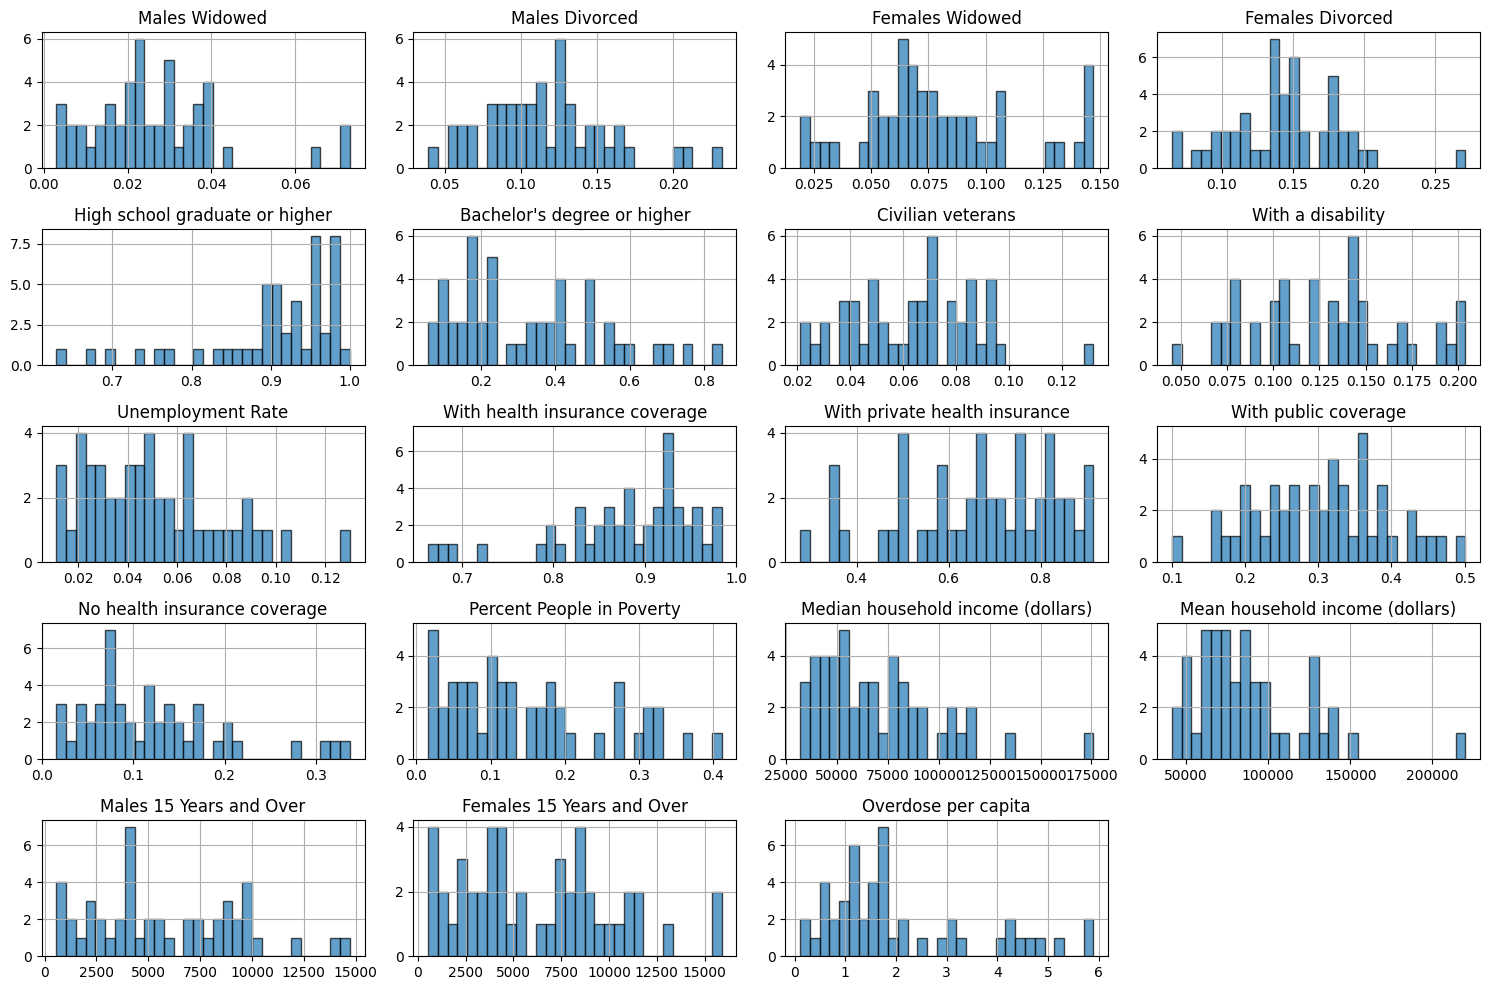

In [743]:
data.hist(figsize=(15, 10), bins=30, edgecolor='k', alpha=0.7)
plt.tight_layout()
plt.show()

Initial Correlation Overview

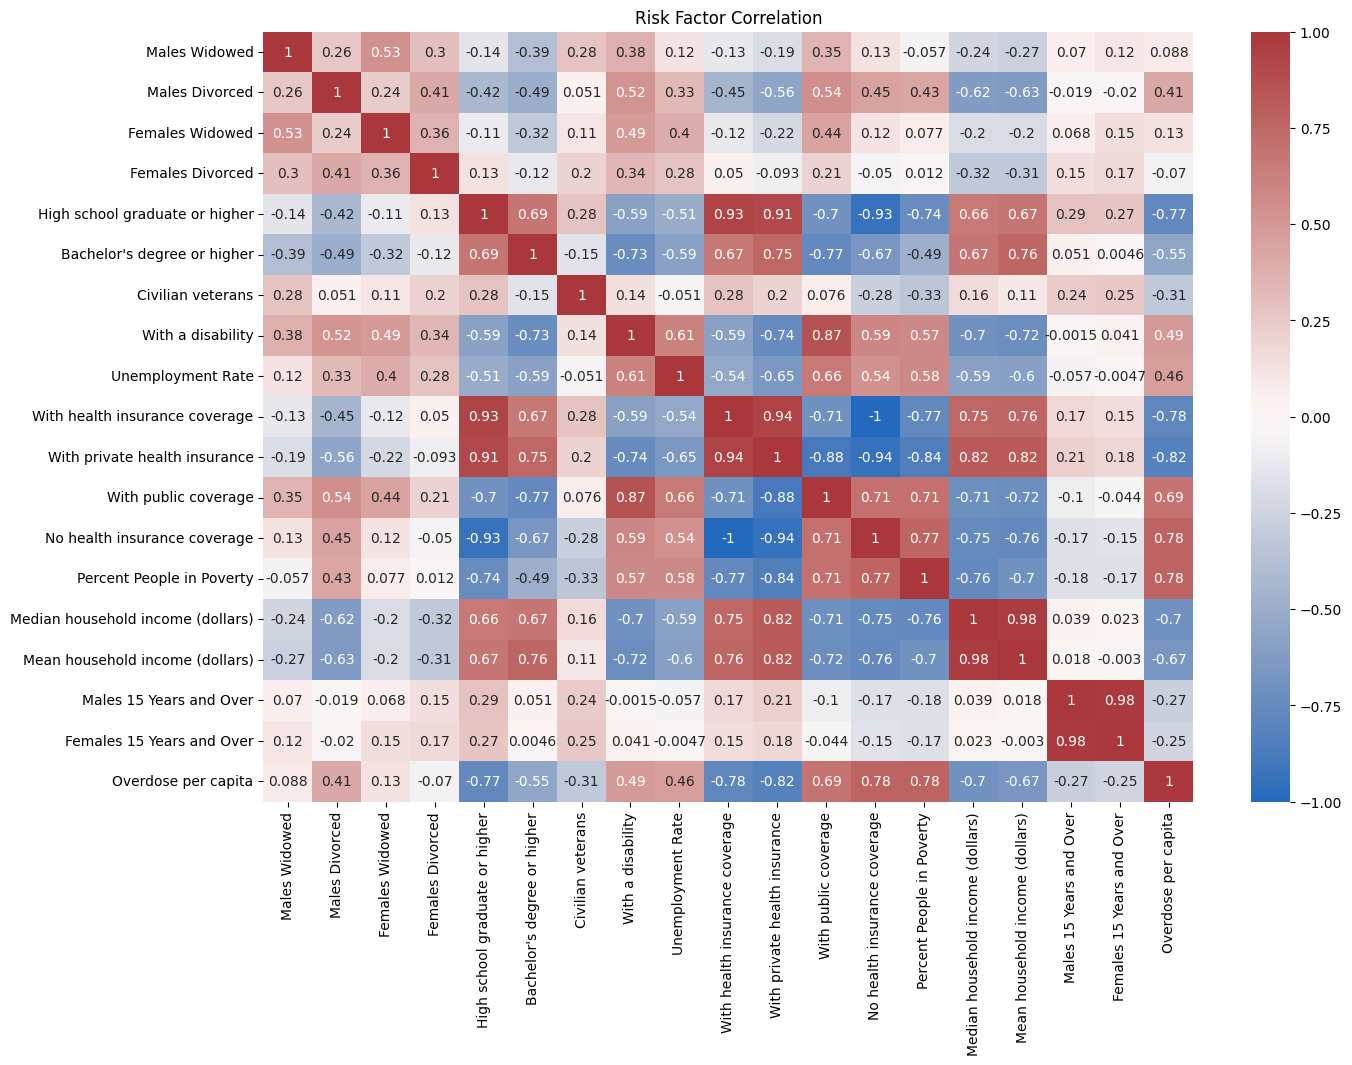

In [744]:
correlation = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap="vlag")
plt.title('Risk Factor Correlation')
plt.show()

In [745]:
corvalues = {}
for i in data.columns:
    correlation = abs(data["Overdose per capita"].corr(data[i]))
    corvalues[correlation] = i
    
corbyval = {}
sortkeys = list(corvalues.keys())
sortkeys.sort(reverse = True)
for s in sortkeys:
    corbyval[s] = corvalues[s]

corbyname = {}
for val in corbyval:
    corbyname[corbyval[val]] = val
for name in corbyname:
    print(name, corbyname[name])

orderedcorlist = list(corbyname.keys())
print(orderedcorlist)
    

Overdose per capita 1.0
With private health insurance 0.8211913312854747
No health insurance coverage 0.7801398014461147
With health insurance coverage 0.7801398014461143
Percent People in Poverty 0.7793800769410153
High school graduate or higher 0.7720978103257105
Median household income (dollars) 0.6976767243689832
With public coverage 0.6902233347835417
Mean household income (dollars) 0.6669943884267255
Bachelor's degree or higher 0.5534408212092973
With a disability 0.4869514460840526
Unemployment Rate 0.4633241178853451
Males Divorced 0.40656590571331885
Civilian veterans 0.3129614732232554
Males 15 Years and Over 0.2741014320162519
Females 15 Years and Over 0.24805385393737722
Females Widowed 0.12751518986001759
Males Widowed 0.08774500743483638
Females Divorced 0.06997705657020589
['Overdose per capita', 'With private health insurance', 'No health insurance coverage', 'With health insurance coverage', 'Percent People in Poverty', 'High school graduate or higher', 'Median househo

## ML 

Train Test Split

In [746]:
train_set, test_set = train_test_split(data,
 test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  38 Test size:  10


Determine which individual factors have the highest predictive value 

In [747]:
# DON"T TOUCH THIS CODE
results = {}
for i in data.columns:
    X = train_set[[i]]
    y = train_set[overdoses]
    X_test = test_set[[i]]
    y_test = test_set[overdoses]
    lr_model = LinearRegression()
    lr_model.fit(X,y)
    y_pred = lr_model.predict(X)
    y_test_pred = lr_model.predict(X_test)
    results[metrics.mean_absolute_percentage_error(y_test,y_test_pred)] = i
#DON"T TOUCH THIS CODE
sortedbyval = {}
sortkeys = list(results.keys())  
sortkeys.sort()
for s in sortkeys:
    sortedbyval[s] = results[s]
#DON"T TOUCH THIS CODE
sortedbyname = {}
for val in sortedbyval:
    sortedbyname[sortedbyval[val]] = val
for name in sortedbyname:
    print(name, sortedbyname[name])
#DON"T TOUCH THIS CODE
orderedfactorlist = list(sortedbyname.keys())
print(orderedfactorlist)
#COMPLETE. DON'T ALTER

Overdose per capita 3.4871660056911063e-16
With health insurance coverage 0.43689666800052207
No health insurance coverage 0.43689666800052296
With private health insurance 0.4416404753389182
High school graduate or higher 0.5418168379067185
Percent People in Poverty 0.563331372942544
Males Divorced 0.5953071702909167
Mean household income (dollars) 0.5988529178605904
Median household income (dollars) 0.6132566751003367
Unemployment Rate 0.6343905645730251
Civilian veterans 0.6447875133115397
Females 15 Years and Over 0.6752885524149891
Males 15 Years and Over 0.690888941507319
Bachelor's degree or higher 0.7004865284547707
With public coverage 0.7421017336208322
Females Divorced 0.7432877147613552
Males Widowed 0.7860573981180731
With a disability 0.8204380348362807
Females Widowed 0.8844401042314601
['Overdose per capita', 'With health insurance coverage', 'No health insurance coverage', 'With private health insurance', 'High school graduate or higher', 'Percent People in Poverty', '

Use the factors with the highest individual value to find the best number of factors to include

In [748]:
#from correlation results
linearfromcorresults = {}
for stop in range (2,20):
    tested = orderedcorlist[1:stop]
    X = train_set[tested]
    y = train_set[overdoses]
    X_test = test_set[tested]
    y_test = test_set[overdoses]
    lr_model = LinearRegression()
    lr_model.fit(X,y)
    y_pred = lr_model.predict(X)
    y_test_pred = lr_model.predict(X_test)
    linearfromcorresults[metrics.mean_absolute_percentage_error(y_test,y_test_pred)] = stop
    print(f"Stop: {stop} MAPE: {metrics.mean_absolute_percentage_error(y_test,y_test_pred)}")

 




Stop: 2 MAPE: 0.4416404753389182
Stop: 3 MAPE: 0.44458273674614335
Stop: 4 MAPE: 0.4418390683379121
Stop: 5 MAPE: 0.5023577954129205
Stop: 6 MAPE: 0.47144214279470525
Stop: 7 MAPE: 0.5051356971049408
Stop: 8 MAPE: 0.5072176098439283
Stop: 9 MAPE: 0.5059219296624987
Stop: 10 MAPE: 0.5148216699211086
Stop: 11 MAPE: 0.4525961324859412
Stop: 12 MAPE: 0.44983790013560626
Stop: 13 MAPE: 0.5116115758532398
Stop: 14 MAPE: 0.503426133602787
Stop: 15 MAPE: 0.5150373327340911
Stop: 16 MAPE: 0.5443775704896222
Stop: 17 MAPE: 0.5765229777253904
Stop: 18 MAPE: 0.5713296461585688
Stop: 19 MAPE: 0.6071002646608008


In [749]:
#from linear regression results
linearresults = {}
for stop in range (2,20):
    tested = orderedfactorlist[1:stop]
    X = train_set[tested]
    y = train_set[overdoses]
    X_test = test_set[tested]
    y_test = test_set[overdoses]
    lr_model = LinearRegression()
    lr_model.fit(X,y)
    y_pred = lr_model.predict(X)
    y_test_pred = lr_model.predict(X_test)
    linearresults[metrics.mean_absolute_percentage_error(y_test,y_test_pred)] = i
    print(f"Stop: {stop} MAPE: {metrics.mean_absolute_percentage_error(y_test,y_test_pred)}")
#COMPLETE. DON'T ALTER

Stop: 2 MAPE: 0.43689666800052207
Stop: 3 MAPE: 0.41109587699800204
Stop: 4 MAPE: 0.4376394133782884
Stop: 5 MAPE: 0.46672486596736595
Stop: 6 MAPE: 0.5052755756360635
Stop: 7 MAPE: 0.5099375665413058
Stop: 8 MAPE: 0.5191155733279722
Stop: 9 MAPE: 0.5803162769068251
Stop: 10 MAPE: 0.5660847340458106
Stop: 11 MAPE: 0.573187858034468
Stop: 12 MAPE: 0.5435940503111695
Stop: 13 MAPE: 0.5894634273541024
Stop: 14 MAPE: 0.5904270981976375
Stop: 15 MAPE: 0.5911432517278775
Stop: 16 MAPE: 0.587741104018953
Stop: 17 MAPE: 0.5986848613853281
Stop: 18 MAPE: 0.5702882777248639
Stop: 19 MAPE: 0.6071002646571196


Try Poly Regression Instead of Linear

In [750]:
#run the regressions
power = 2
poly_process = PolynomialFeatures(degree=power, include_bias=False)
regressions = {}
for stop in range (2,20):
    tested = orderedfactorlist[1:stop]
    X = train_set[tested]
    y = train_set[overdoses]
    X_poly = poly_process.fit_transform(X)
    X_test = test_set[tested]
    y_test = test_set[overdoses]
    X_poly_test = poly_process.fit_transform(X_test)
    lr_model = LinearRegression()
    lr_model.fit(X_poly,y)
    y_pred = lr_model.predict(X_poly)
    y_test_pred = lr_model.predict(X_poly_test) 
    regressions[stop] = metrics.mean_absolute_percentage_error(y_test,y_test_pred)
    print(f"Stop: {stop} MAPE: {metrics.mean_absolute_percentage_error(y_test,y_test_pred)}")

    


Stop: 2 MAPE: 0.43515591001833764
Stop: 3 MAPE: 0.4522900889162921
Stop: 4 MAPE: 0.440318271439498
Stop: 5 MAPE: 0.4162804562989095
Stop: 6 MAPE: 0.4340656840893482
Stop: 7 MAPE: 0.7129104523263196
Stop: 8 MAPE: 0.8807020743154913
Stop: 9 MAPE: 1.6083978967939547
Stop: 10 MAPE: 2.4526488316911395
Stop: 11 MAPE: 0.6665051911841433
Stop: 12 MAPE: 1.5984562789672576
Stop: 13 MAPE: 0.5885373851456839
Stop: 14 MAPE: 1.1412623851739163
Stop: 15 MAPE: 1.0278508125955916
Stop: 16 MAPE: 1.0798112910204198
Stop: 17 MAPE: 0.9852966154623527
Stop: 18 MAPE: 0.7614865595426863
Stop: 19 MAPE: 2.3336491541173117


In [751]:
#puts the score first, stop second
scorefirst = {}
for stop in regressions:
    scorefirst[regressions[stop]] = stop

#orders the pairs by score
scoresordered = {}
hold = list(scorefirst.keys())
hold.sort()
for h in hold:
    scoresordered[h] = scorefirst[h]

#list of stops, in order by regression fit
stopsordered = list(scoresordered.values())
print(stopsordered)

[5, 6, 2, 4, 3, 13, 11, 7, 18, 8, 17, 15, 16, 14, 12, 9, 19, 10]


In [752]:
#create a variable that is the factors used for the regression that fits best
bestfactors = list()
beststop = stopsordered[0]
for factor in orderedfactorlist[1:beststop]:
    bestfactors.append(factor)
print(bestfactors)    

['With health insurance coverage', 'No health insurance coverage', 'With private health insurance', 'High school graduate or higher']


In [753]:
X = train_set[bestfactors]
y = train_set[overdoses]
X_poly = poly_process.fit_transform(X)
X_test = test_set[bestfactors]
y_test = test_set[overdoses]
X_poly_test = poly_process.fit_transform(X_test)
lr_model = LinearRegression()
lr_model.fit(X_poly,y)
y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print(' Default settings')
print('Internal parameters:')
print(' Bias is ', lr_model.intercept_)
print(' Coefficients', lr_model.coef_)

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)

polymae = metrics.mean_absolute_error(y_test,y_test_pred)
polymse = metrics.mean_squared_error(y_test,y_test_pred)
polyrmse = metrics.mean_squared_error(y_test,y_test_pred, squared=False)
polymape = metrics.mean_absolute_percentage_error(y_test,y_test_pred)

print()
print('Results for polynomial regression on test data')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test,y_test_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(y_test,y_test_pred))

Results for polynomial regression on training data
 Default settings
Internal parameters:
 Bias is  17496398174578.598
 Coefficients [-1.98617371e+13 -1.18786016e+13  2.39482478e+13 -3.32422970e+11
  2.36533889e+12 -3.25245769e+12 -2.39482478e+13  3.32422970e+11
 -5.61779658e+12 -2.39482478e+13  3.32422970e+11  6.05625000e+01
 -1.41488281e+02  4.39453125e+00]
Mean Absolute Error: 0.5423075769339195
Mean Squared Error: 0.5093009335037638
Root Mean Squared Error: 0.7136532305705369
Mean Absolute Percentage Error: 0.4802361326576191

Results for polynomial regression on test data
Mean Absolute Error: 0.5664271034337712
Mean Squared Error: 0.716484778761778
Root Mean Squared Error: 0.8464542390240467
Mean Absolute Percentage Error: 0.4162804562989095


In [754]:
x = data.drop(overdoses, axis=1)
y = data[overdoses]

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)
sc=StandardScaler()

scaler = sc.fit(trainX)
trainX_scaled = scaler.transform(trainX)
testX_scaled = scaler.transform(testX)

In [765]:
net = MLPRegressor(hidden_layer_sizes=(150,100,50),max_iter = 300,activation = 'relu',solver = 'adam')
net.fit(trainX_scaled, trainY)
y_pred = net.predict(testX_scaled)

df_check = pd.DataFrame({'Actual': testY, 'Predicted': y_pred})
print(df_check.head())

netmae = metrics.mean_absolute_error(testY, y_pred)
netmse = metrics.mean_squared_error(testY, y_pred)
netrmse = metrics.mean_squared_error(testY, y_pred, squared=False)
netmape = metrics.mean_absolute_percentage_error(testY, y_pred)


print('Mean Absolute Error:', metrics.mean_absolute_error(testY, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(testY, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(testY, y_pred, squared=False))
print('Mean Absolute Percentage Error:', metrics.mean_absolute_percentage_error(testY, y_pred))

            Actual  Predicted
Zip Code                     
64130     5.169443   4.026835
64057     1.212807   1.290224
64124     4.353234   4.941507
64113     0.105363   0.301890
64014     0.868294   0.954337
Mean Absolute Error: 0.35999138221358246
Mean Squared Error: 0.2301323104121995
Root Mean Squared Error: 0.47972107563895866
Mean Absolute Percentage Error: 0.30989356806267443
